以后代码尽量与笔记的章节对应，方便查找

### 3.1.2 评估方法

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np

# 加载 Titanic 数据集
df = pd.read_csv("../input/titanic.csv")

# 数据预处理
# 选择数值和类别特征
numerical_features = ['Age', 'Fare']  # 数值特征
categorical_features = ['Sex', 'Pclass']  # 类别特征

# 构造预处理步骤
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # 填补缺失值
    ('scaler', StandardScaler())  # 标准化
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 填补缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 独热编码
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 定义目标变量和特征
X = df[['Age', 'Fare', 'Sex', 'Pclass']]
y = df['Survived']  # 生存与否是目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 创建模型流水线
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 在训练集上训练模型
model.fit(X_train, y_train)

# 获取训练集上的回归系数
coefs_train = model.named_steps['regressor'].coef_

# 预测训练集的目标值并计算准确率
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)

# 在测试集上训练模型
model.fit(X_test, y_test)

# 获取测试集上的回归系数
coefs_test = model.named_steps['regressor'].coef_

# 预测测试集的目标值并计算准确率
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

# 打印训练集和测试集的回归系数
print("训练集上的回归系数:")
print(coefs_train)

print("\n测试集上的回归系数:")
print(coefs_test)

# 打印训练集和测试集的准确率
print("\n训练集上的 R² 准确率: {:.4f}".format(train_r2))
print("测试集上的 R² 准确率: {:.4f}".format(test_r2))


训练集上的回归系数:
[-0.04761385  0.01932153  0.25603174 -0.25603174  0.11621646  0.05061214
 -0.1668286 ]

测试集上的回归系数:
[-0.09023746 -0.0226823   0.24574646 -0.24574646  0.27427401 -0.06382405
 -0.21044996]

训练集上的 R² 准确率: 0.3848
测试集上的 R² 准确率: 0.3975


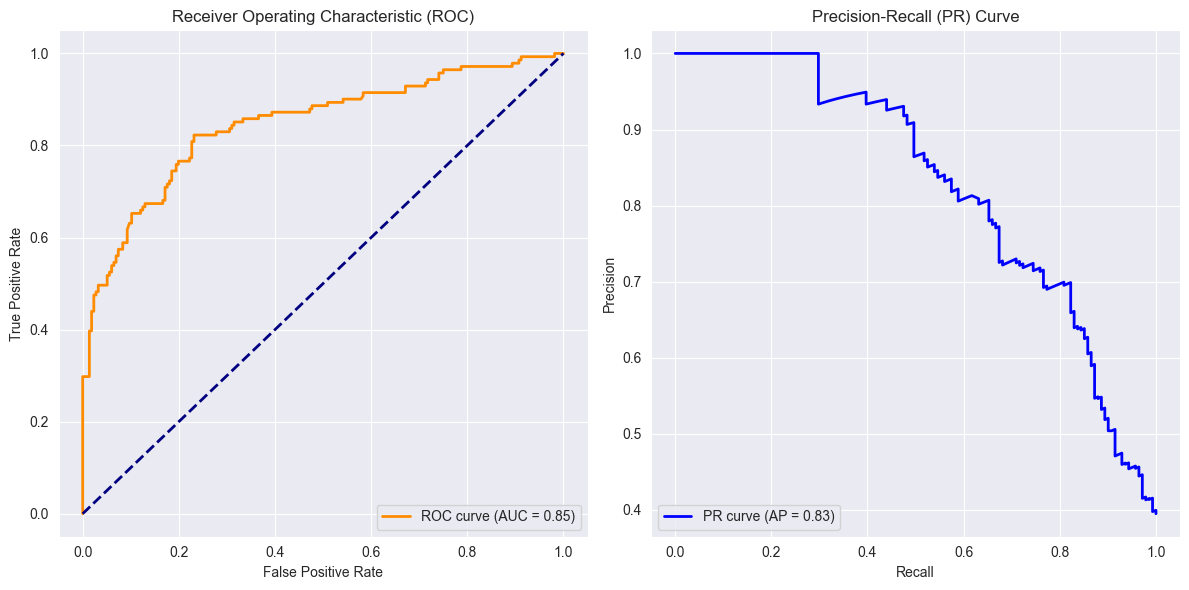

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 加载 Titanic 数据集
df = pd.read_csv("../input/titanic.csv")

# 数据预处理
numerical_features = ['Age', 'Fare']  # 数值特征
categorical_features = ['Sex', 'Pclass']  # 类别特征

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 定义目标变量和特征
X = df[['Age', 'Fare', 'Sex', 'Pclass']]
y = df['Survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 创建分类模型流水线
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 在训练集上训练模型
model.fit(X_train, y_train)

# 获取测试集上的预测概率
y_score = model.predict_proba(X_test)[:, 1]  # 获取正类的预测概率

# 计算 ROC 曲线和 AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 计算 Precision-Recall 曲线和 Average Precision
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_score)
avg_precision = average_precision_score(y_test, y_score)

# 绘制 ROC 曲线
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 对角线
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# 绘制 Precision-Recall 曲线
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f"PR curve (AP = {avg_precision:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()
